<a href="https://colab.research.google.com/github/arushijha03/reelMetrics/blob/main/ML_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Labeled_Cleaned_Movies_Data_1995_2024.csv")
df.head()

,TITLE,YEAR,DURATION,MPA,RATING,VOTES,BUDGET,GROSSWORLDWIDE,DIRECTORS,WRITERS,STARS,GENRES,COUNTRIES_ORIGIN,FILMING_LOCATIONS,PRODUCTION_COMPANIES,LANGUAGES,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,Barbie,2023,114.0,PG-13,6.8,585000.0,100000000.0,1.446938e+09,['Greta Gerwig'],"['Greta Gerwig', 'Noah Baumbach']","['Issa Rae', 'Margot Robbie', 'Ryan Gosling']","['Adventure', 'Comedy', 'Fantasy', 'High-Conce...","['United Kingdom', 'United States']","['Venice Beach, Venice, Los Angeles, Californi...","['Heyday Films', 'LuckyChap', 'Warner Bros.']","['English', 'Spanish']",433,0,Successful
1,The Super Mario Bros. Movie,2023,92.0,PG,7.0,257000.0,100000000.0,1.360848e+09,"['Aaron Horvath', 'Michael Jelenic', 'Pierre L...",['Matthew Fogel'],"['Anya Taylor-Joy', 'Charlie Day', 'Chris Pratt']","['Adventure', 'Adventure Epic', 'Animation', '...","['Japan', 'United States']","['Paris, France']","['Illumination Entertainment', 'Nintendo', 'Un...",['English'],48,0,Successful
2,Spider-Man: Across the Spider-Verse,2023,140.0,PG,8.5,428000.0,150000000.0,6.908247e+08,"['Joaquim Dos Santos', 'Justin K. Thompson', '...","['Christopher Miller', 'Dave Callaham', 'Phil ...","['Brian Tyree Henry', 'Hailee Steinfeld', 'Sha...","['Action', 'Adventure', 'Animation', 'Computer...",['United States'],[],"['Avi Arad Productions', 'Columbia Pictures', ...",['English'],164,1,Successful
3,Guardians of the Galaxy Vol. 3,2023,150.0,PG-13,7.9,411000.0,250000000.0,8.455558e+08,['James Gunn'],"['James Gunn', 'Jim Starlin', 'Stan Lee']","['Bradley Cooper', 'Chris Pratt', 'Chukwudi Iw...","['Action', 'Adventure', 'Comedy', 'Sci-Fi', 'S...","['Canada', 'France', 'New Zealand', 'United St...","['Atlanta, Georgia, USA']","['Film New Zealand', 'Marvel Entertainment', '...","['English', 'Russian']",88,1,Successful
4,Oppenheimer,2023,180.0,R,8.3,834000.0,100000000.0,9.755950e+08,['Christopher Nolan'],"['Christopher Nolan', 'Kai Bird', 'Martin Sher...","['Cillian Murphy', 'Emily Blunt', 'Matt Damon']","['Biography', 'Docudrama', 'Drama', 'Epic', 'H...","['United Kingdom', 'United States']","['Los Alamos, New Mexico, USA']","['Atlas Entertainment', 'Gadget Films', 'Unive...","['Dutch', 'English', 'German', 'Italian']",369,0,Successful


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15850 entries, 0 to 15849
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TITLE                 15850 non-null  object 
 1   YEAR                  15850 non-null  int64  
 2   DURATION              15850 non-null  float64
 3   MPA                   15850 non-null  object 
 4   RATING                15850 non-null  float64
 5   VOTES                 15850 non-null  float64
 6   BUDGET                15850 non-null  float64
 7   GROSSWORLDWIDE        15850 non-null  float64
 8   DIRECTORS             15850 non-null  object 
 9   WRITERS               15850 non-null  object 
 10  STARS                 15850 non-null  object 
 11  GENRES                15850 non-null  object 
 12  COUNTRIES_ORIGIN      15850 non-null  object 
 13  FILMING_LOCATIONS     15850 non-null  object 
 14  PRODUCTION_COMPANIES  15850 non-null  object 
 15  LANGUAGES          

In [ ]:
print(df['MOVIE_CATEGORY'].value_counts())

MOVIE_CATEGORY
Failure       10460
Successful     4204
Mediocre       1186
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

features = ['DURATION', 'RATING', 'VOTES', 'BUDGET', 'GROSSWORLDWIDE', 'NOMINATIONS', 'OSCARS']
target = 'MOVIE_CATEGORY'

print("Dataset Before Preparation for SVM:\n")
display(df[features + [target]].head())

le = LabelEncoder()
df[target] = le.fit_transform(df[target])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDataset After Preparation for SVM (Train Set):\n")
display(pd.DataFrame(X_train_scaled, columns=features).head())
print("\nDataset After Preparation for SVM (Test Set):\n")
display(pd.DataFrame(X_test_scaled, columns=features).head())

Dataset Before Preparation for SVM:



,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,114.0,6.8,585000.0,100000000.0,1.446938e+09,433,0,Successful
1,92.0,7.0,257000.0,100000000.0,1.360848e+09,48,0,Successful
2,140.0,8.5,428000.0,150000000.0,6.908247e+08,164,1,Successful
3,150.0,7.9,411000.0,250000000.0,8.455558e+08,88,1,Successful
4,180.0,8.3,834000.0,100000000.0,9.755950e+08,369,0,Successful



Dataset After Preparation for SVM (Train Set):



,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
0,-0.782377,0.435608,-0.299805,-0.064286,-0.305647,0.078775,-0.212790
1,1.137056,1.409991,5.427529,0.003779,2.064526,4.413948,1.829735
2,-1.422188,0.612769,-0.347533,-0.064286,-0.308546,-0.375386,-0.212790
3,0.588646,0.967090,-0.278111,-0.064286,-0.268948,0.161350,-0.212790
4,0.314442,0.258448,-0.369011,-0.064286,-0.308768,-0.375386,-0.212790



Dataset After Preparation for SVM (Test Set):



,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
0,0.177339,-0.981676,-0.270879,-0.064286,-0.150033,-0.375386,-0.21279
1,-0.690976,0.789929,-0.311376,-0.064243,-0.299974,-0.375386,-0.21279
2,-0.873779,0.169867,1.247732,0.063336,6.335144,0.243924,-0.21279
3,-0.279669,-0.450195,-0.278111,-0.064286,-0.206569,-0.210237,-0.21279
4,0.177339,-1.513158,-0.369235,-0.064286,-0.309706,-0.375386,-0.21279



=== Linear SVM Models ===
Linear SVM Accuracy (C=0.01): 0.8328

Linear SVM (C=0.01) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.85      0.97      0.91      2087
    Mediocre       0.43      0.04      0.07       253
  Successful       0.79      0.73      0.76       830

    accuracy                           0.83      3170
   macro avg       0.69      0.58      0.58      3170
weighted avg       0.80      0.83      0.80      3170



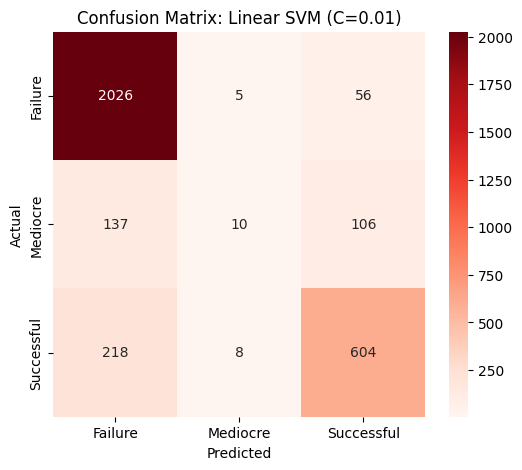

Linear SVM Accuracy (C=0.1): 0.8319

Linear SVM (C=0.1) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.85      0.97      0.91      2087
    Mediocre       0.38      0.05      0.08       253
  Successful       0.79      0.73      0.76       830

    accuracy                           0.83      3170
   macro avg       0.67      0.58      0.58      3170
weighted avg       0.80      0.83      0.80      3170



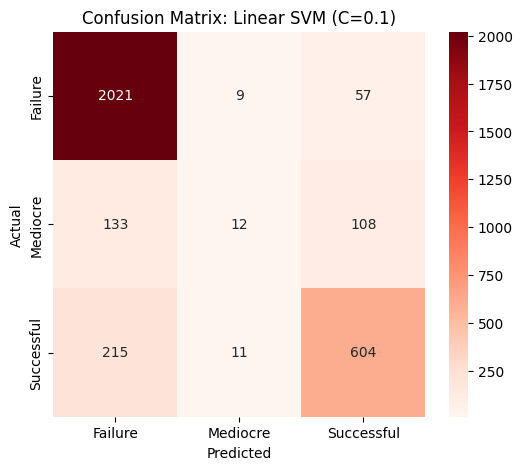

Linear SVM Accuracy (C=1): 0.8315

Linear SVM (C=1) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.85      0.97      0.91      2087
    Mediocre       0.35      0.05      0.08       253
  Successful       0.79      0.73      0.75       830

    accuracy                           0.83      3170
   macro avg       0.66      0.58      0.58      3170
weighted avg       0.80      0.83      0.80      3170



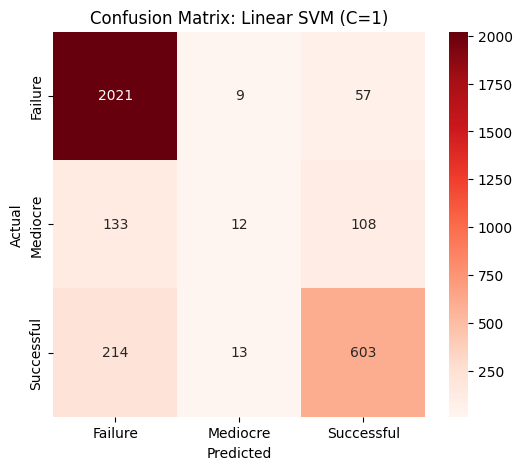

In [ ]:
from sklearn.svm import LinearSVC, SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("\n=== Linear SVM Models ===")

# Model 1
linear_svm_param1="Kernel: Linear, Cost: 0.01"
linear_svm1 = LinearSVC(C=0.01, max_iter=10000, random_state=42, class_weight='balanced')
linear_svm1.fit(X_train_scaled, y_train)
pred1 = linear_svm1.predict(X_test_scaled)
linear_acc1 = accuracy_score(y_test, pred1)
print(f"Linear SVM Accuracy (C=0.01): {linear_acc1:.4f}")

print("\nLinear SVM (C=0.01) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred1, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred1)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: Linear SVM (C=0.01)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 2
linear_svm_param2="Kernel: Linear, Cost: 0.1"
linear_svm2 = LinearSVC(C=0.1, max_iter=10000, random_state=42, class_weight='balanced')
linear_svm2.fit(X_train_scaled, y_train)
pred2 = linear_svm2.predict(X_test_scaled)
linear_acc2 = accuracy_score(y_test, pred2)
print(f"Linear SVM Accuracy (C=0.1): {linear_acc2:.4f}")

print("\nLinear SVM (C=0.1) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred2, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: Linear SVM (C=0.1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 3
linear_svm_param3="Kernel: Linear, Cost: 1"
linear_svm3 = LinearSVC(C=1, max_iter=10000, random_state=42, class_weight='balanced')
linear_svm3.fit(X_train_scaled, y_train)
pred3 = linear_svm3.predict(X_test_scaled)
linear_acc3 = accuracy_score(y_test, pred3)
print(f"Linear SVM Accuracy (C=1): {linear_acc3:.4f}")

print("\nLinear SVM (C=1) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred3, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred3)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: Linear SVM (C=1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


=== RBF SVM Models ===
RBF SVM Accuracy (C=0.01): 0.8180

RBF SVM (C=0.01) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.91      0.90      0.90      2087
    Mediocre       0.35      0.49      0.41       253
  Successful       0.80      0.71      0.75       830

    accuracy                           0.82      3170
   macro avg       0.68      0.70      0.69      3170
weighted avg       0.83      0.82      0.82      3170



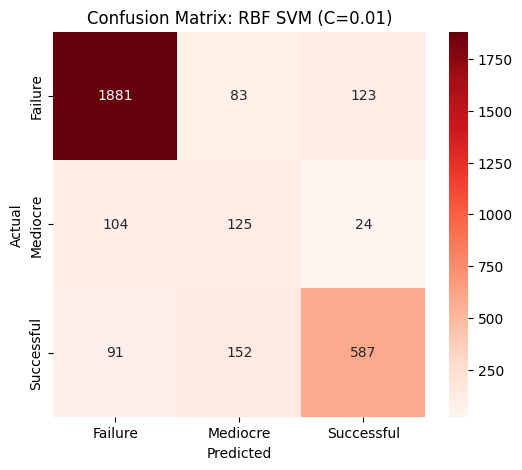

RBF SVM Accuracy (C=1): 0.8454

RBF SVM (C=1) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.95      0.88      0.91      2087
    Mediocre       0.41      0.76      0.53       253
  Successful       0.86      0.78      0.82       830

    accuracy                           0.85      3170
   macro avg       0.74      0.81      0.75      3170
weighted avg       0.88      0.85      0.86      3170



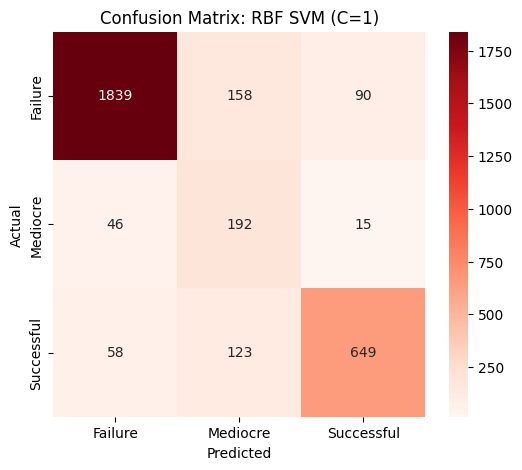

RBF SVM Accuracy (C=10): 0.8580

RBF SVM (C=10) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.95      0.88      0.91      2087
    Mediocre       0.43      0.77      0.55       253
  Successful       0.88      0.83      0.85       830

    accuracy                           0.86      3170
   macro avg       0.75      0.83      0.77      3170
weighted avg       0.89      0.86      0.87      3170



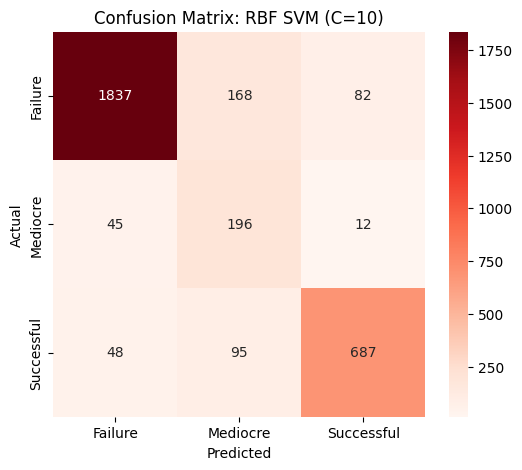

In [ ]:
print("\n=== RBF SVM Models ===")

# Model 4
rbf_svm_param1="Kernel: RBF, Cost: 0.01"
rbf_svm1 = SVC(C=0.01, kernel='rbf', gamma='scale', random_state=42, class_weight='balanced')
rbf_svm1.fit(X_train_scaled, y_train)
pred4 = rbf_svm1.predict(X_test_scaled)
rbf_acc1 = accuracy_score(y_test, pred4)
print(f"RBF SVM Accuracy (C=0.01): {rbf_acc1:.4f}")

print("\nRBF SVM (C=0.01) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred4, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred4)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: RBF SVM (C=0.01)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 5
rbf_svm_param2="Kernel: RBF, Cost: 1"
rbf_svm2 = SVC(C=1, kernel='rbf', gamma='scale', random_state=42, class_weight='balanced')
rbf_svm2.fit(X_train_scaled, y_train)
pred5 = rbf_svm2.predict(X_test_scaled)
rbf_acc2 = accuracy_score(y_test, pred5)
print(f"RBF SVM Accuracy (C=1): {rbf_acc2:.4f}")

print("\nRBF SVM (C=1) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred5, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred5)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: RBF SVM (C=1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 6
rbf_svm_param3="Kernel: RBF, Cost: 10"
rbf_svm3 = SVC(C=10, kernel='rbf', gamma='scale', random_state=42, class_weight='balanced')
rbf_svm3.fit(X_train_scaled, y_train)
pred6 = rbf_svm3.predict(X_test_scaled)
rbf_acc3 = accuracy_score(y_test, pred6)
print(f"RBF SVM Accuracy (C=10): {rbf_acc3:.4f}")

print("\nRBF SVM (C=10) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred6, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred6)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: RBF SVM (C=10)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


=== Polynomial SVM Models ===
Polynomial SVM Accuracy (C=0.01, Degree=2): 0.7489

Polynomial SVM (C=0.01, Degree=2) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.73      1.00      0.84      2087
    Mediocre       0.00      0.00      0.00       253
  Successful       0.92      0.35      0.51       830

    accuracy                           0.75      3170
   macro avg       0.55      0.45      0.45      3170
weighted avg       0.72      0.75      0.69      3170



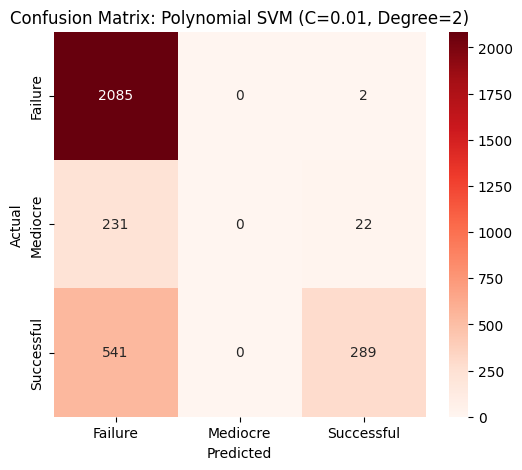

Polynomial SVM Accuracy (C=1, Degree=3): 0.8126

Polynomial SVM (C=1, Degree=3) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.80      0.99      0.88      2087
    Mediocre       0.25      0.00      0.01       253
  Successful       0.89      0.60      0.72       830

    accuracy                           0.81      3170
   macro avg       0.65      0.53      0.54      3170
weighted avg       0.78      0.81      0.77      3170



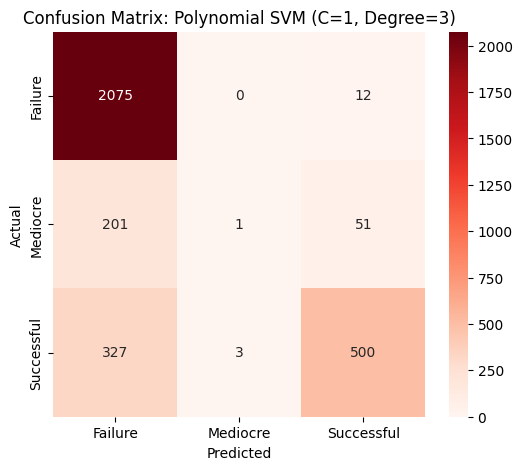

Polynomial SVM Accuracy (C=10, Degree=4): 0.8290

Polynomial SVM (C=10, Degree=4) Results:

Classification Report:
              precision    recall  f1-score   support

     Failure       0.81      0.99      0.89      2087
    Mediocre       0.68      0.08      0.15       253
  Successful       0.93      0.64      0.76       830

    accuracy                           0.83      3170
   macro avg       0.81      0.57      0.60      3170
weighted avg       0.83      0.83      0.80      3170



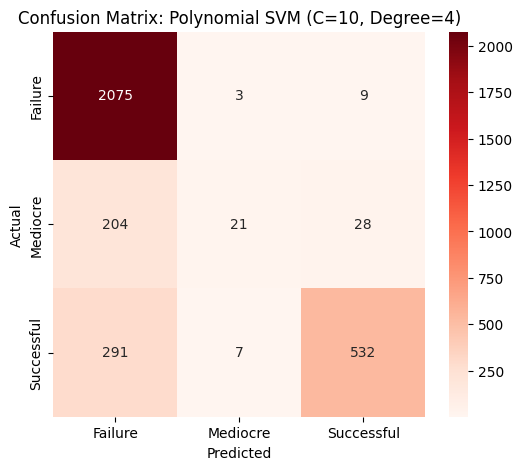

In [ ]:
print("\n=== Polynomial SVM Models ===")

# Model 7
poly_svm_param1="Kernel: Poly, Degree: 2, Cost: 0.01"
poly_svm1 = SVC(C=0.01, kernel='poly', degree=2, gamma='scale', random_state=42)
poly_svm1.fit(X_train_scaled, y_train)
pred7 = poly_svm1.predict(X_test_scaled)
poly_acc1 = accuracy_score(y_test, pred7)
print(f"Polynomial SVM Accuracy (C=0.01, Degree=2): {poly_acc1:.4f}")

print("\nPolynomial SVM (C=0.01, Degree=2) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred7, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred7)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: Polynomial SVM (C=0.01, Degree=2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 8
poly_svm_param2="Kernel: Poly, Degree: 3, Cost: 1"
poly_svm2 = SVC(C=1, kernel='poly', degree=3, gamma='scale', random_state=42)
poly_svm2.fit(X_train_scaled, y_train)
pred8 = poly_svm2.predict(X_test_scaled)
poly_acc2 = accuracy_score(y_test, pred8)
print(f"Polynomial SVM Accuracy (C=1, Degree=3): {poly_acc2:.4f}")

print("\nPolynomial SVM (C=1, Degree=3) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred8, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred8)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: Polynomial SVM (C=1, Degree=3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 9
poly_svm_param3="Kernel: Poly, Degree: 4, Cost: 10"
poly_svm3 = SVC(C=10, kernel='poly', degree=4, gamma='scale', random_state=42)
poly_svm3.fit(X_train_scaled, y_train)
pred9 = poly_svm3.predict(X_test_scaled)
poly_acc3 = accuracy_score(y_test, pred9)
print(f"Polynomial SVM Accuracy (C=10, Degree=4): {poly_acc3:.4f}")

print("\nPolynomial SVM (C=10, Degree=4) Results:")
print("\nClassification Report:")
print(classification_report(y_test, pred9, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))
cm = confusion_matrix(y_test, pred9)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Failure', 'Mediocre', 'Successful'], yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title('Confusion Matrix: Polynomial SVM (C=10, Degree=4)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd

svm_summary = pd.DataFrame({
    'Model': [
        linear_svm_param1, linear_svm_param2, linear_svm_param3,
        rbf_svm_param1, rbf_svm_param2, rbf_svm_param3,
        poly_svm_param1, poly_svm_param2, poly_svm_param3
    ],
    'Accuracy': [
        linear_acc1, linear_acc2, linear_acc3,
        rbf_acc1, rbf_acc2, rbf_acc3,
        poly_acc1, poly_acc2, poly_acc3
    ]
})

print("SVM Model Accuracy:")
display(svm_summary)

SVM Model Accuracy:


,Model,Accuracy
0,"Kernel: Linear, Cost: 0.01",0.832808
1,"Kernel: Linear, Cost: 0.1",0.831861
2,"Kernel: Linear, Cost: 1",0.831546
3,"Kernel: RBF, Cost: 0.01",0.817981
4,"Kernel: RBF, Cost: 1",0.845426
5,"Kernel: RBF, Cost: 10",0.858044
6,"Kernel: Poly, Degree: 2, Cost: 0.01",0.748896
7,"Kernel: Poly, Degree: 3, Cost: 1",0.812618
8,"Kernel: Poly, Degree: 4, Cost: 10",0.829022


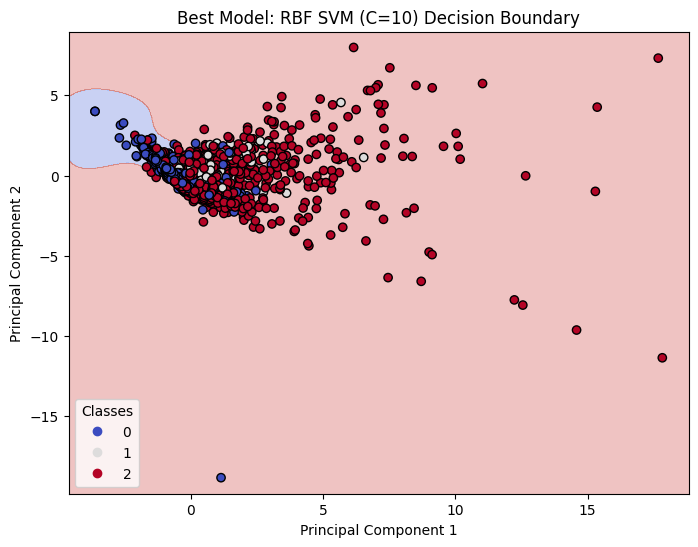

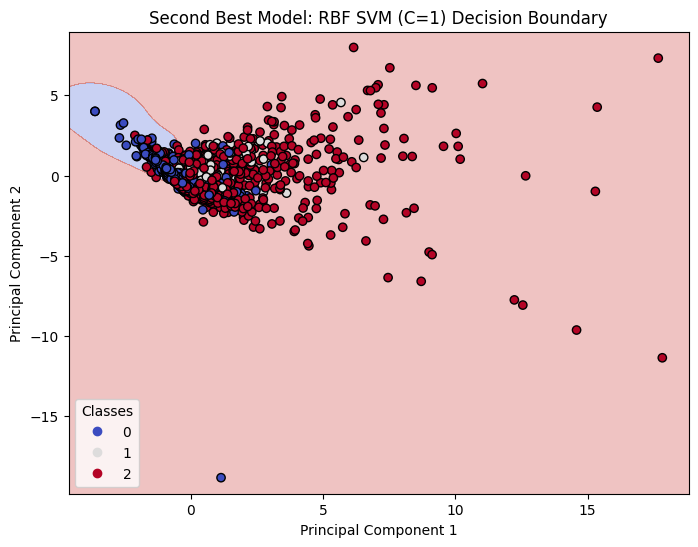

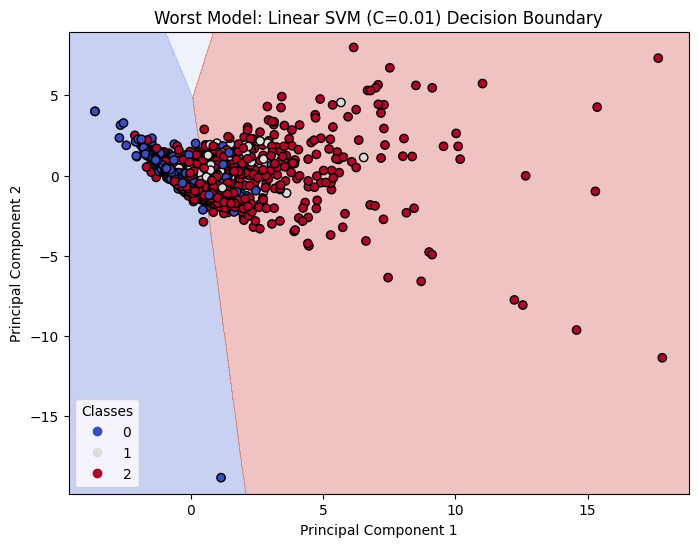

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

features = ['DURATION', 'RATING', 'VOTES', 'BUDGET', 'GROSSWORLDWIDE', 'NOMINATIONS', 'OSCARS']
target = 'MOVIE_CATEGORY'

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

best_model = SVC(kernel='rbf', C=10, gamma='scale')
second_best_model = SVC(kernel='rbf', C=1, gamma='scale')
worst_model = LinearSVC(C=0.01, max_iter=10000)

best_model.fit(X_train_pca, y_train)
second_best_model.fit(X_train_pca, y_train)
worst_model.fit(X_train_pca, y_train)

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary(best_model, X_test_pca, y_test, "Best Model: RBF SVM (C=10) Decision Boundary")
plot_decision_boundary(second_best_model, X_test_pca, y_test, "Second Best Model: RBF SVM (C=1) Decision Boundary")
plot_decision_boundary(worst_model, X_test_pca, y_test, "Worst Model: Linear SVM (C=0.01) Decision Boundary")

## Ensemble Learning

Dataset Before Preparation for XGBoost:



,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,114.0,6.8,585000.0,100000000.0,1.446938e+09,433,0,2
1,92.0,7.0,257000.0,100000000.0,1.360848e+09,48,0,2
2,140.0,8.5,428000.0,150000000.0,6.908247e+08,164,1,2
3,150.0,7.9,411000.0,250000000.0,8.455558e+08,88,1,2
4,180.0,8.3,834000.0,100000000.0,9.755950e+08,369,0,2



Dataset After Feature Selection and Label Encoding:


,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS,MOVIE_CATEGORY
0,114.0,6.8,585000.0,100000000.0,1.446938e+09,433,0,2
1,92.0,7.0,257000.0,100000000.0,1.360848e+09,48,0,2
2,140.0,8.5,428000.0,150000000.0,6.908247e+08,164,1,2
3,150.0,7.9,411000.0,250000000.0,8.455558e+08,88,1,2
4,180.0,8.3,834000.0,100000000.0,9.755950e+08,369,0,2



Dataset After Preparation(Train Set):



,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
0,-0.787701,-0.352697,-0.303826,-0.061820,-0.305991,-0.365714,-0.20481
1,-0.004393,-0.616372,-0.077557,-0.018481,0.183181,-0.208643,-0.20481
2,-0.787701,-0.440589,-0.366490,-0.062185,-0.306107,-0.365714,-0.20481
3,-0.326932,0.526221,-0.277416,-0.062185,-0.239777,-0.208643,-0.20481
4,-0.695547,0.965679,-0.321671,-0.062170,-0.300939,-0.090839,-0.20481



Dataset After Preparation(Test Set):



,DURATION,RATING,VOTES,BUDGET,GROSSWORLDWIDE,NOMINATIONS,OSCARS
0,-0.280855,-0.001130,-0.320243,-0.062185,-0.304983,-0.012304,-0.20481
1,-0.603393,-0.352697,-0.156073,-0.053444,-0.148985,-0.365714,-0.20481
2,-0.326932,0.086762,0.043787,-0.054901,-0.184445,-0.287179,-0.20481
3,-0.050470,1.141463,-0.324526,-0.062185,-0.306213,-0.365714,-0.20481
4,-0.465162,-0.176913,-0.120384,-0.062185,-0.306578,-0.365714,-0.20481



XGBoost Accuracy: 0.9852

Classification Report:
              precision    recall  f1-score   support

     Failure       0.99      0.99      0.99      2092
    Mediocre       0.92      0.92      0.92       237
  Successful       0.99      0.98      0.98       841

    accuracy                           0.99      3170
   macro avg       0.96      0.96      0.96      3170
weighted avg       0.99      0.99      0.99      3170



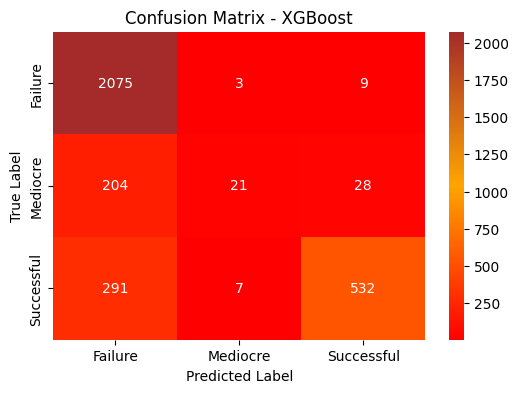

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

features = ['DURATION', 'RATING', 'VOTES', 'BUDGET', 'GROSSWORLDWIDE', 'NOMINATIONS', 'OSCARS']
target = 'MOVIE_CATEGORY'

print("Dataset Before Preparation for XGBoost:\n")
display(df[features + [target]].head())

le = LabelEncoder()
df[target] = le.fit_transform(df[target])

X = df[features]
y = df[target]

print("\nDataset After Feature Selection and Label Encoding:")
display(df[features + [target]].head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDataset After Preparation(Train Set):\n")
display(pd.DataFrame(X_train_scaled, columns=features).head())
print("\nDataset After Preparation(Test Set):\n")
display(pd.DataFrame(X_test_scaled, columns=features).head())

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"\nXGBoost Accuracy: {acc:.4f}")

colors = ["red", "orange", "brown"]
cmap = LinearSegmentedColormap.from_list("RedOrangeBrown", colors)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Failure', 'Mediocre', 'Successful'], zero_division=0))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=['Failure', 'Mediocre', 'Successful'],
            yticklabels=['Failure', 'Mediocre', 'Successful'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

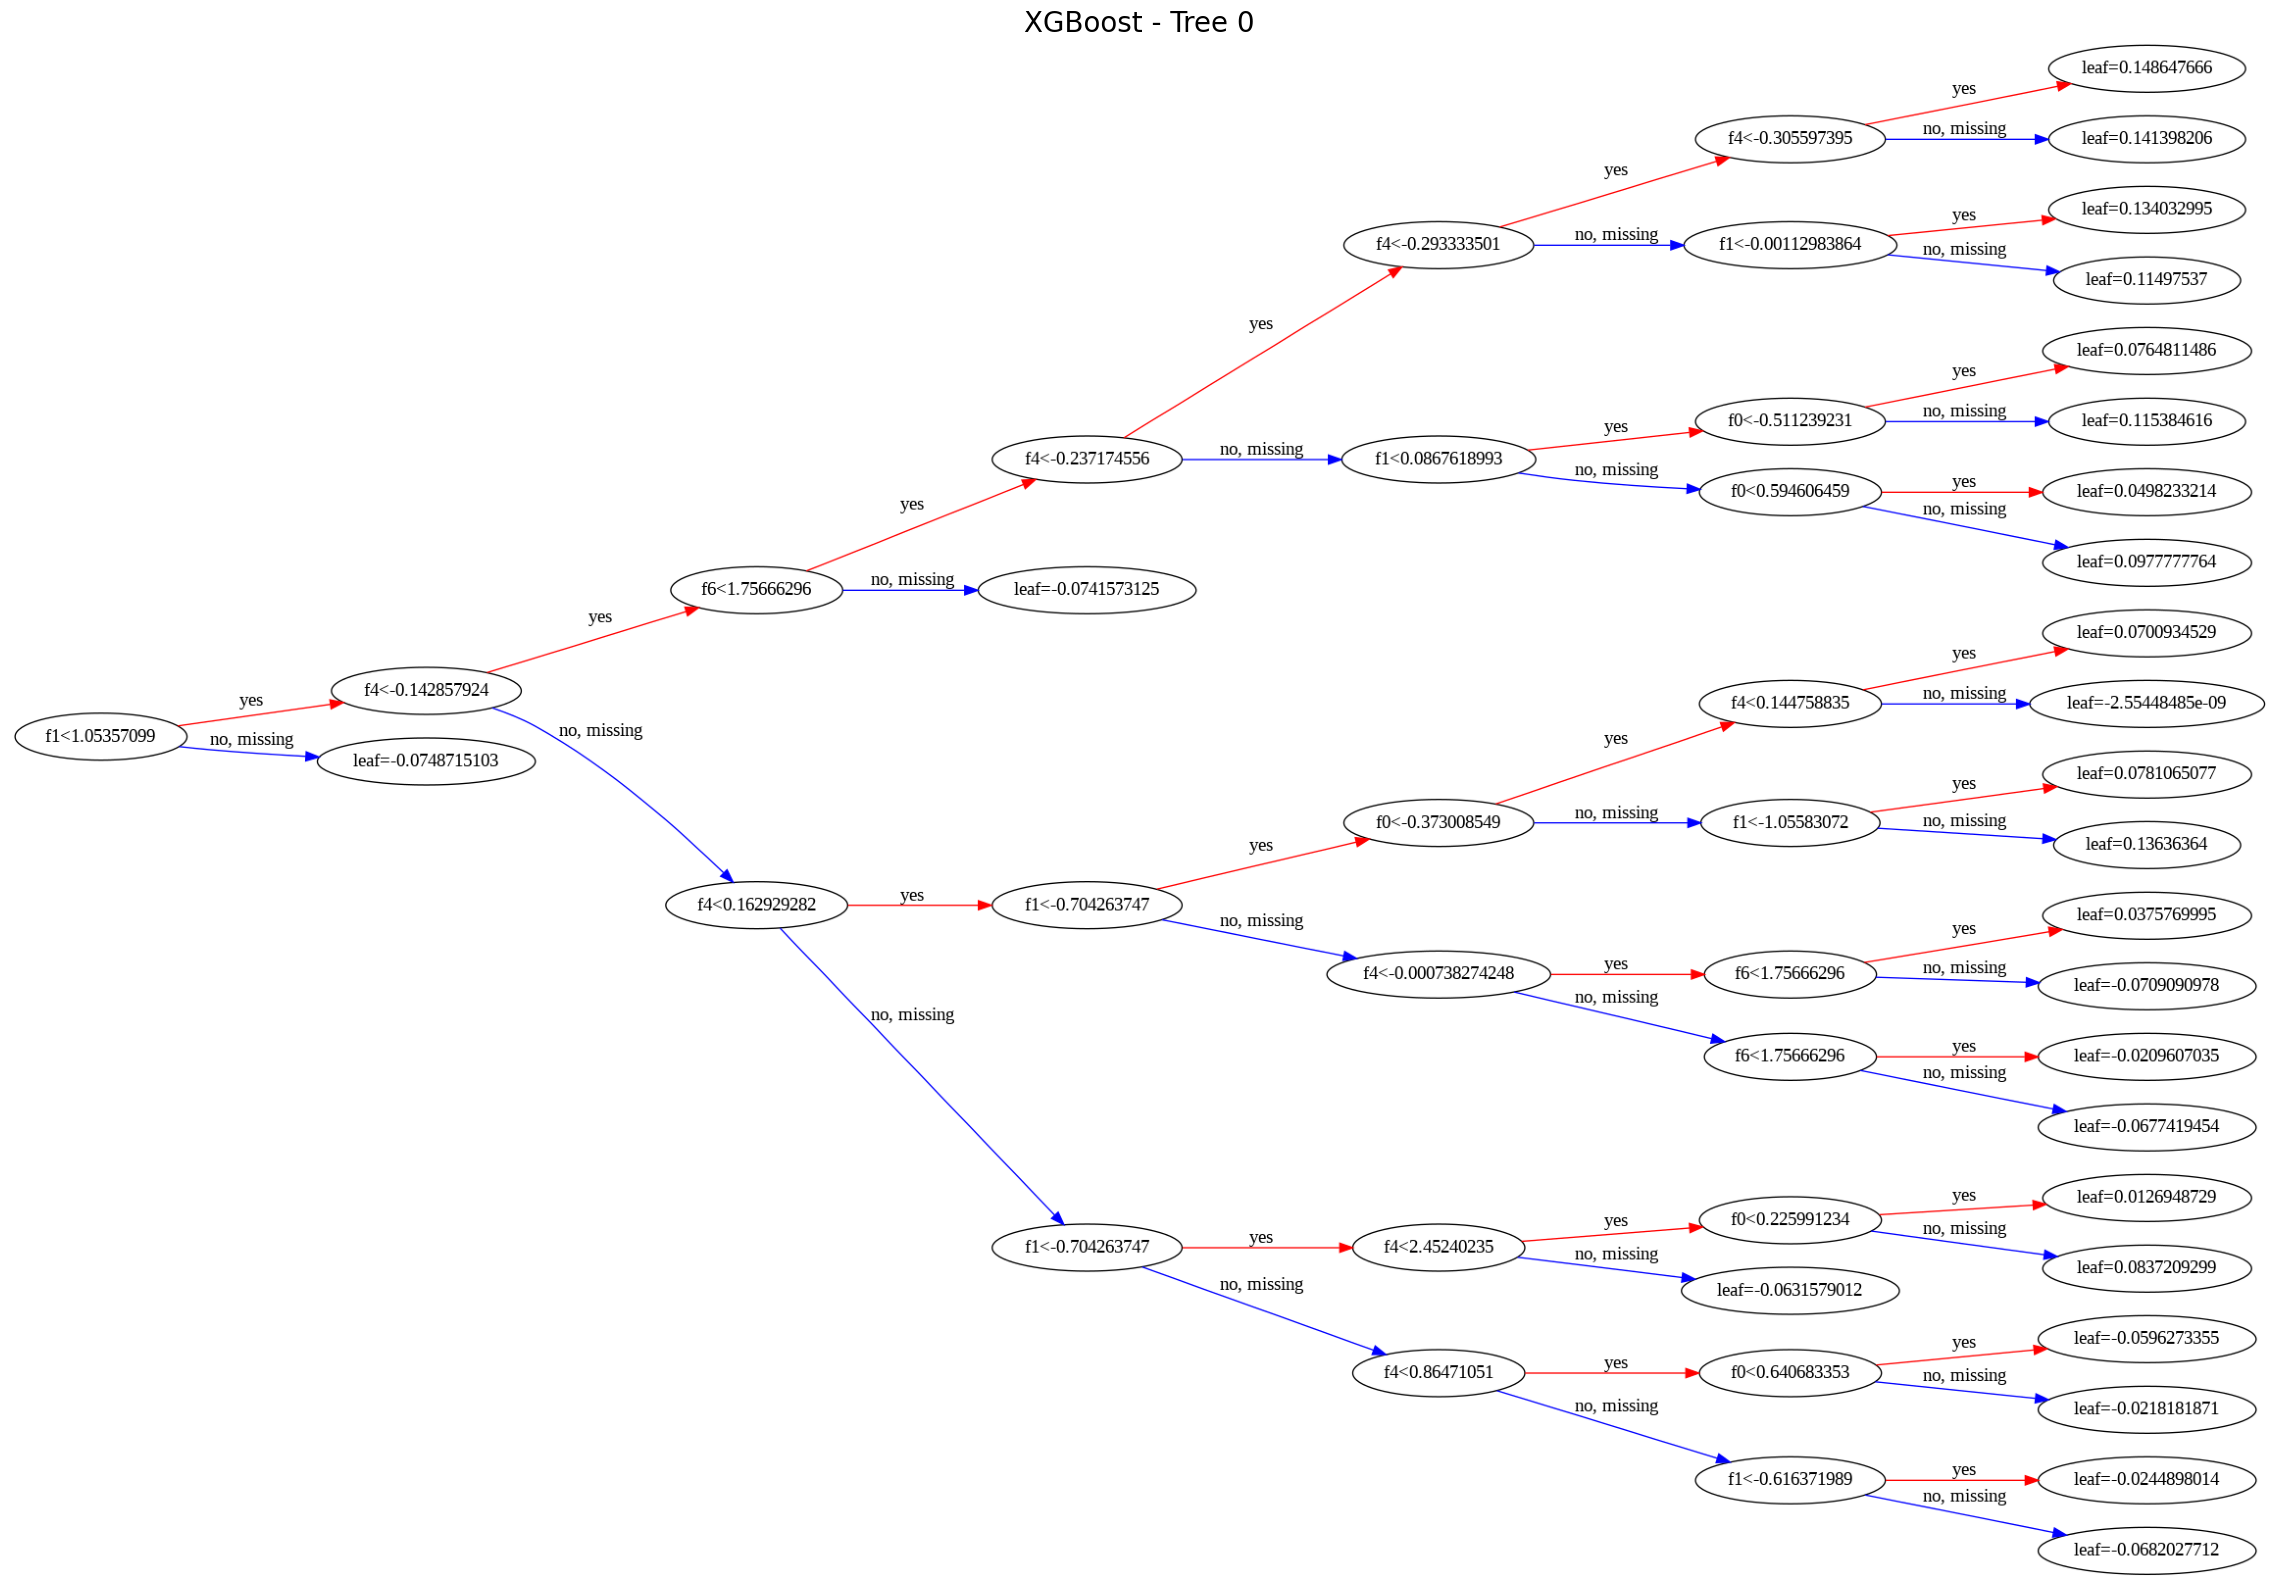

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40, 20))
plot_tree(xgb_model, num_trees=0, rankdir='LR', ax=ax)
plt.title("XGBoost - Tree 0", fontsize=20)
plt.show()